## Pre-processing

---

### ([Pour zoomer dans l'image de Synthèse](img/Synthèse.png))

![alt text](img\Synthèse.png)


L'objective est de traiter notre jeux de données trainset.csv
 - Gerer les valeurs manquantes
 - Choix des colonnes à traiter
 - Gérer le déséquilibre dans les classes (category_id)

## Gestion des valeurs manquantes

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df = pd.read_csv(r'data\trainset.csv')
df

,product_id,category_id,category_path,main_image_id,secondary_image_id
0,b82e6254-3ec9-46a2-b8f7-b5929e035496,9f851daf,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/9f851daf,fea69231-ebb4,658ca173-9caa
1,43e37281-92dd-4b16-9ccd-fca0d095568d,068c35b0,db6e4514/9699ae0b/0fc18ec1/4d8a5187/b9e4f158/0...,6d1f2537-032a,a815d5b4-a8c0
2,7d9c8f22-0d2c-4c13-aed8-071d9aefb5b3,f7ac9307,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/f7ac9307,f571dad3-6b0d,82194909-b4ad
3,07d66a64-d8a2-4f87-8b37-b063aad33b9d,92df953a,db6e4514/d8d2ce05/5ba4aaaa/2f35b995/92df953a,b741aa90-0c27,d246e435-b7e5
4,db7c0046-f9e1-4a7e-865c-e0a6dcd90086,5af8e010,db6e4514/c225693c/ea17ab48/ab190885/1f310b6a/1...,6a759b3d-54c1,d8561940-c744
...,...,...,...,...,...
9995,d97e21d6-ba3e-430e-a257-78102f63d740,83185036,db6e4514/9699ae0b/0fc18ec1/2bf38614/154e0cb5/8...,1ffd928c-80b3,9a79dcce-0f5d
9996,915682d6-0cb7-4f66-9abf-6b64b6479adb,54a9c08e,db6e4514/9699ae0b/0fc18ec1/4aa2b4eb/54a9c08e,4daa930f-9f5f,8ea81658-8764
9997,d9dd41a3-e896-489b-b841-6066bf16378d,bb743b7b,db6e4514/c225693c/ea17ab48/ab190885/cb84ddc8/f...,1cd8ce66-d2fa,511ed9ee-c6f5
9998,fd06d6ed-16e2-4675-8c82-972c47eafac4,417f81d7,db6e4514/928d326d/b145f96e/1c3a1671/9ec92cce/4...,31ef81dd-2a01,5111d1dc-7526


In [3]:
dataset_summary = df.describe(include='all')
dataset_summary

,product_id,category_id,category_path,main_image_id,secondary_image_id
count,10000,10000,10000,9984,7297
unique,10000,100,100,9758,7102
top,b82e6254-3ec9-46a2-b8f7-b5929e035496,be737efb,db6e4514/1def83d5/1c71253d/be737efb,a7b9db3a-946c,38e3f36b-5903
freq,1,151,151,14,15


In [4]:
# Supprimer les lignes où `main_image_id` est NaN
df_cleaned = df.dropna(subset=['main_image_id'])
df_cleaned

,product_id,category_id,category_path,main_image_id,secondary_image_id
0,b82e6254-3ec9-46a2-b8f7-b5929e035496,9f851daf,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/9f851daf,fea69231-ebb4,658ca173-9caa
1,43e37281-92dd-4b16-9ccd-fca0d095568d,068c35b0,db6e4514/9699ae0b/0fc18ec1/4d8a5187/b9e4f158/0...,6d1f2537-032a,a815d5b4-a8c0
2,7d9c8f22-0d2c-4c13-aed8-071d9aefb5b3,f7ac9307,db6e4514/9699ae0b/0fc18ec1/ac2aef7a/f7ac9307,f571dad3-6b0d,82194909-b4ad
3,07d66a64-d8a2-4f87-8b37-b063aad33b9d,92df953a,db6e4514/d8d2ce05/5ba4aaaa/2f35b995/92df953a,b741aa90-0c27,d246e435-b7e5
4,db7c0046-f9e1-4a7e-865c-e0a6dcd90086,5af8e010,db6e4514/c225693c/ea17ab48/ab190885/1f310b6a/1...,6a759b3d-54c1,d8561940-c744
...,...,...,...,...,...
9995,d97e21d6-ba3e-430e-a257-78102f63d740,83185036,db6e4514/9699ae0b/0fc18ec1/2bf38614/154e0cb5/8...,1ffd928c-80b3,9a79dcce-0f5d
9996,915682d6-0cb7-4f66-9abf-6b64b6479adb,54a9c08e,db6e4514/9699ae0b/0fc18ec1/4aa2b4eb/54a9c08e,4daa930f-9f5f,8ea81658-8764
9997,d9dd41a3-e896-489b-b841-6066bf16378d,bb743b7b,db6e4514/c225693c/ea17ab48/ab190885/cb84ddc8/f...,1cd8ce66-d2fa,511ed9ee-c6f5
9998,fd06d6ed-16e2-4675-8c82-972c47eafac4,417f81d7,db6e4514/928d326d/b145f96e/1c3a1671/9ec92cce/4...,31ef81dd-2a01,5111d1dc-7526


In [5]:
dataset_summary = df_cleaned.describe(include='all')
dataset_summary

,product_id,category_id,category_path,main_image_id,secondary_image_id
count,9984,9984,9984,9984,7291
unique,9984,100,100,9758,7096
top,b82e6254-3ec9-46a2-b8f7-b5929e035496,be737efb,db6e4514/1def83d5/1c71253d/be737efb,a7b9db3a-946c,38e3f36b-5903
freq,1,150,150,14,15


## Choix des colonnes à traiter

In [6]:
# Vérification des valeurs manquantes
missing_values = df_cleaned.isnull().sum()
print("Valeurs manquantes dans chaque colonne:")
print(missing_values)

Valeurs manquantes dans chaque colonne:
product_id               0
category_id              0
category_path            0
main_image_id            0
secondary_image_id    2693
dtype: int64


Nous n'aurons pas besoin des 'product_id', 'category_path' pour l'entrainnement donc on peut supprimer ces colonnes 

In [7]:
columns_to_drop = ['category_path']
df_prepared = df_cleaned.drop(columns=columns_to_drop)
df_prepared

,product_id,category_id,main_image_id,secondary_image_id
0,b82e6254-3ec9-46a2-b8f7-b5929e035496,9f851daf,fea69231-ebb4,658ca173-9caa
1,43e37281-92dd-4b16-9ccd-fca0d095568d,068c35b0,6d1f2537-032a,a815d5b4-a8c0
2,7d9c8f22-0d2c-4c13-aed8-071d9aefb5b3,f7ac9307,f571dad3-6b0d,82194909-b4ad
3,07d66a64-d8a2-4f87-8b37-b063aad33b9d,92df953a,b741aa90-0c27,d246e435-b7e5
4,db7c0046-f9e1-4a7e-865c-e0a6dcd90086,5af8e010,6a759b3d-54c1,d8561940-c744
...,...,...,...,...
9995,d97e21d6-ba3e-430e-a257-78102f63d740,83185036,1ffd928c-80b3,9a79dcce-0f5d
9996,915682d6-0cb7-4f66-9abf-6b64b6479adb,54a9c08e,4daa930f-9f5f,8ea81658-8764
9997,d9dd41a3-e896-489b-b841-6066bf16378d,bb743b7b,1cd8ce66-d2fa,511ed9ee-c6f5
9998,fd06d6ed-16e2-4675-8c82-972c47eafac4,417f81d7,31ef81dd-2a01,5111d1dc-7526


La colonne secondary_image_id est une colonne intéresente parce que elle contient 7096 image avec leurs étiquettes donc on ne vas pas la supprimer

In [11]:
dataset_summary = df_prepared.describe(include='all')
dataset_summary

,product_id,category_id,main_image_id,secondary_image_id
count,9984,9984,9984,7291
unique,9984,100,9758,7096
top,b82e6254-3ec9-46a2-b8f7-b5929e035496,be737efb,a7b9db3a-946c,38e3f36b-5903
freq,1,150,14,15


## Traitement de la colonne Secondary_image_id 

Nous remarquons que 2693 sont nan dans secondary_image_id, mais il y a comme meme 7096 image, on ne veux pas les supprimer, Nous allons les ajouter en tand que nouvelles lignes avec leur category_id correspondant

In [12]:
# Étape 1: Créer un DataFrame pour les `main_image_id`
df_main_images = df_prepared[['category_id', 'main_image_id']].copy()
df_main_images = df_main_images.rename(columns={'main_image_id': 'image_id'})

# Étape 2: Créer un DataFrame pour les `secondary_image_id`
# Filtrer uniquement les `secondary_image_id` non-NaN
df_secondary_images = df_prepared[['category_id', 'secondary_image_id']].dropna().copy()
df_secondary_images = df_secondary_images.rename(columns={'secondary_image_id': 'image_id'})

# Étape 3: Combiner les deux DataFrames
df_combined = pd.concat([df_main_images, df_secondary_images], ignore_index=True)

# Vérifier le nouveau DataFrame combiné
print(f"Nombre total d'images dans df_combined: {len(df_combined)}")
df_combined

Nombre total d'images dans df_combined: 17275


,category_id,image_id
0,9f851daf,fea69231-ebb4
1,068c35b0,6d1f2537-032a
2,f7ac9307,f571dad3-6b0d
3,92df953a,b741aa90-0c27
4,5af8e010,6a759b3d-54c1
...,...,...
17270,83185036,9a79dcce-0f5d
17271,54a9c08e,8ea81658-8764
17272,bb743b7b,511ed9ee-c6f5
17273,417f81d7,5111d1dc-7526


In [13]:
# Vérification des valeurs manquantes
missing_values = df_combined.isnull().sum()
print("Valeurs manquantes dans chaque colonne:")
print(missing_values)

Valeurs manquantes dans chaque colonne:
category_id    0
image_id       0
dtype: int64


In [14]:
dataset_summary = df_combined.describe(include='all')
dataset_summary

,category_id,image_id
count,17275,17275
unique,100,16725
top,010870b0,38e3f36b-5903
freq,276,15


## Gestion du déséquilibre entre les classes

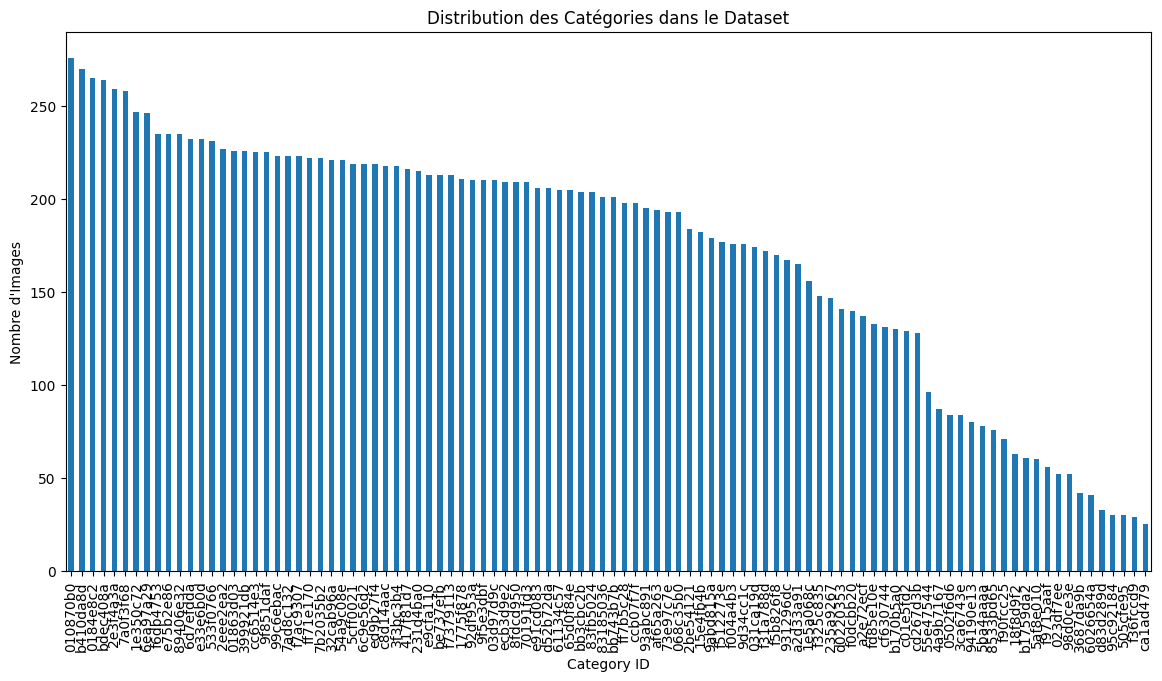

Résumé statistique de la distribution des catégories:
count    100.000000
mean     172.750000
std       67.655601
min       25.000000
25%      132.500000
50%      201.000000
75%      221.000000
max      276.000000
Name: count, dtype: float64


In [15]:
import matplotlib.pyplot as plt

# Compter le nombre d'images par catégorie
category_distribution = df_combined['category_id'].value_counts()

# Visualiser la distribution des catégories
plt.figure(figsize=(14, 7))
category_distribution.plot(kind='bar')
plt.title('Distribution des Catégories dans le Dataset')
plt.xlabel('Category ID')
plt.ylabel('Nombre d\'Images')
plt.xticks(rotation=90)
plt.show()

# Afficher un résumé statistique de la distribution des catégories
print("Résumé statistique de la distribution des catégories:")
print(category_distribution.describe())


- Notre jeux de données est non balancé. Cela reprsentera forcement le gros problème de cette muti-classes classification
- Il existe beaucoup de techniques qu'on peut tester (under-sampling, over-sampling, data-augmentation on minority classe) 
- Nous utiliserons la technique de gestion des poids lors de l'entrainnement pour penaliser les poids des classes avec plus données

In [22]:
# Ajouter l'extension .jpg à l'image_id 
df_combined['image_id'] = df_combined['image_id'].apply(lambda x: f"{x}.jpg" if not x.endswith('.jpg') else x)
df_combined.to_csv(r'data/clean_trainset.csv', index=False)
df_combined

,category_id,image_id
0,9f851daf,fea69231-ebb4.jpg
1,068c35b0,6d1f2537-032a.jpg
2,f7ac9307,f571dad3-6b0d.jpg
3,92df953a,b741aa90-0c27.jpg
4,5af8e010,6a759b3d-54c1.jpg
...,...,...
17270,83185036,9a79dcce-0f5d.jpg
17271,54a9c08e,8ea81658-8764.jpg
17272,bb743b7b,511ed9ee-c6f5.jpg
17273,417f81d7,5111d1dc-7526.jpg


###  Sauvegarder notre jeux de données traité

In [ ]:
df_combined.to_csv('data/clean_trainset.csv', index=False)  

## Augmentation du nombre d'image et traitement des images d'entrainement

### Dans cette partie, nous allons utiliser la fonction ImageDataGenerator pour l'augmentation, redimensionnement, et normalisation de notre données d'entrainnement

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images avec augmentation, redimensionnement, et normalisation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255  # Normalisation
)

# Utiliser flow_from_dataframe pour appliquer ces transformations sur les images
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_combined,
    directory='all_images/',        # Répertoire contenant les images
    x_col='image_id',           # Colonne contenant les noms des fichiers images
    y_col='category_id',        # Colonne contenant les étiquettes
    target_size=(224, 224),     # Redimensionnement des images
    batch_size=32,
    class_mode='categorical',   # Classification multi-classes
    shuffle=True                # Mélanger les données pour l'entraînement !
)

images, labels = next(train_generator)
print(f"Shape des images: {images.shape}")
print(f"Shape des étiquettes: {labels.shape}")


Found 17275 validated image filenames belonging to 100 classes.
Shape des images: (32, 224, 224, 3)
Shape des étiquettes: (32, 100)


## Split dataset to train and validation

### Split the dataset into training (80%) and validation (20%) sets

Il est essentiel de découper notre jeu de données en une partie d'entraînement et une partie de validation pour une évaluation précise du modèle. Une répartition équilibrée des classes entre les deux sets permet de mesurer correctement les performances et de suivre l'évolution de la fonction de perte. De plus, l'activation du shuffle garantit une distribution aléatoire, évitant les biais liés à l'ordre des données.

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and validation (20%) sets
df_train, df_val = train_test_split(
    df_combined, 
    test_size=0.2, 
    stratify=df_combined['category_id'],  # Ensures an even distribution of classes
    shuffle=True, # Shuffle the dataset before splitting
    random_state=42  # For reproducibility
)

# Vérifier la taille des ensembles d'entraînement et de validation
print(f"Nombre d'images d'entraînement: {len(df_train)}")
print(f"Nombre d'images de validation: {len(df_val)}")


Nombre d'images d'entraînement: 13820
Nombre d'images de validation: 3455


### Verification que tous notre dataset a son image dans le dossier all_images

Nous vérifions ici que image_id ont effectivement leur correspondant image dans le dossier all_images

In [2]:
df_combined = pd.read_csv(r'data\clean_trainset.csv')
df_combined

,category_id,image_id
0,9f851daf,fea69231-ebb4.jpg
1,068c35b0,6d1f2537-032a.jpg
2,f7ac9307,f571dad3-6b0d.jpg
3,92df953a,b741aa90-0c27.jpg
4,5af8e010,6a759b3d-54c1.jpg
...,...,...
17270,83185036,9a79dcce-0f5d.jpg
17271,54a9c08e,8ea81658-8764.jpg
17272,bb743b7b,511ed9ee-c6f5.jpg
17273,417f81d7,5111d1dc-7526.jpg


In [4]:
import os

image_directory = 'all_images/'

missing_images = []

# Check if each image in df_train exists in the directory
for image_id in df_combined['image_id']:
    image_path = os.path.join(image_directory, image_id)
    
    if not os.path.isfile(image_path):
        missing_images.append(image_id)

if len(missing_images) > 0:
    print(f"Number of missing images: {len(missing_images)}")
    print("Missing image files:", missing_images)
else:
    print("All images in df_combined exist in the folder all_images.")


All images in df_combined exist in the folder all_images.


## Comparaison entre les jeux de données d'entrainnement et de test

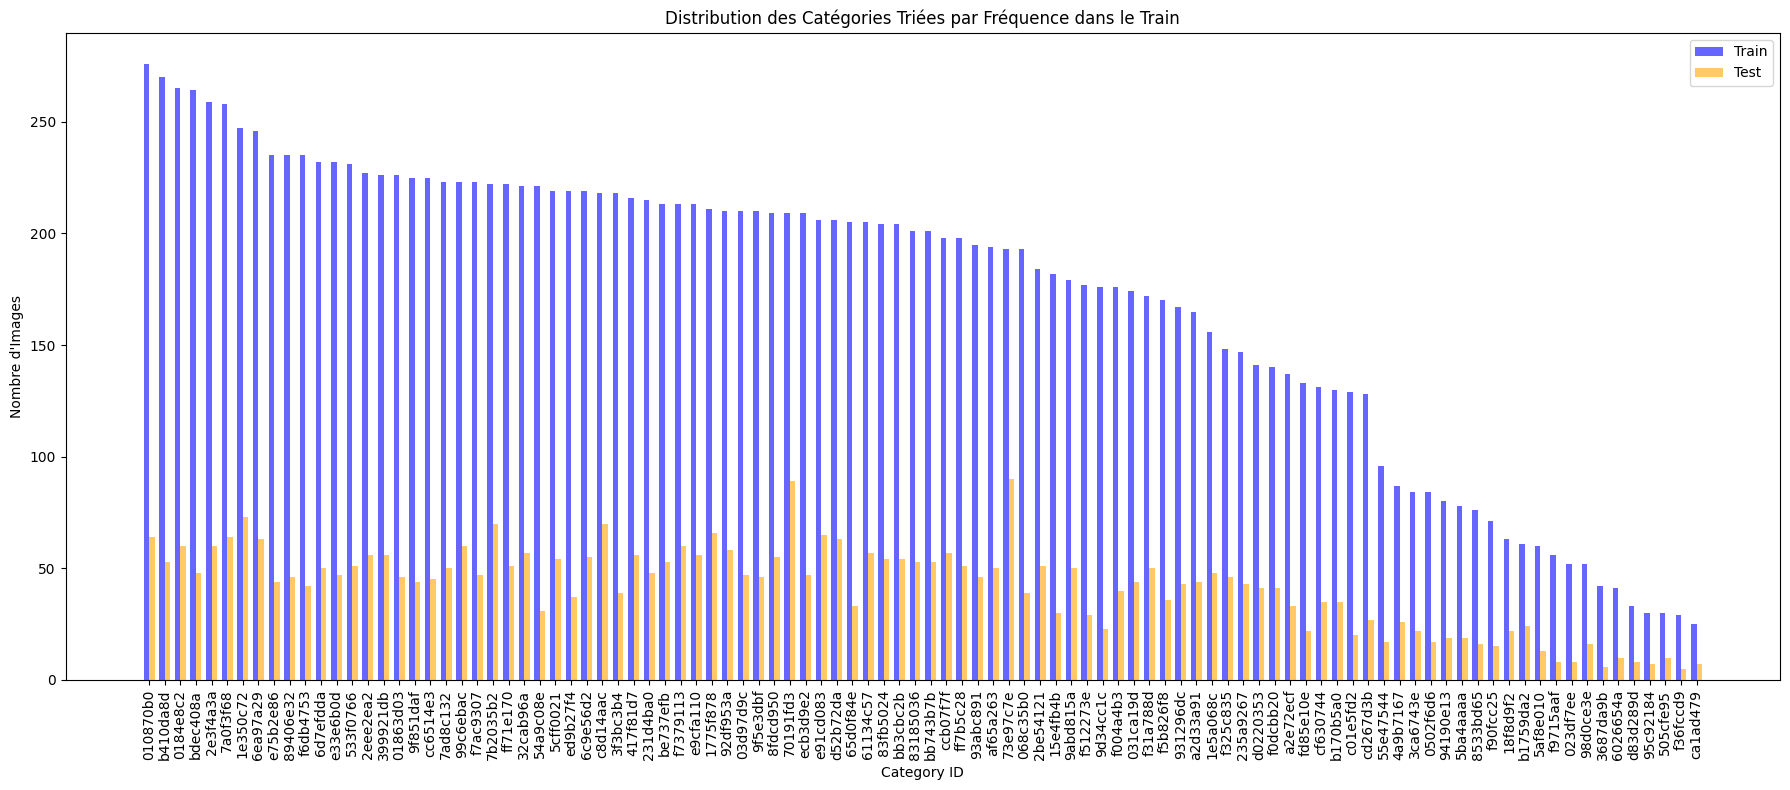

Nombre de produits pour la catégorie 399921db - Train: 226, Test: 56


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df_test = pd.read_csv(r'data\clean_testset.csv')
df_train = pd.read_csv(r'data\clean_trainset.csv')

category_distribution_test = df_test['category_id'].value_counts()
category_distribution_train = df_train['category_id'].value_counts()

categories = sorted(set(category_distribution_test.index).union(set(category_distribution_train.index)))

category_distribution_test = category_distribution_test.reindex(categories, fill_value=0)
category_distribution_train = category_distribution_train.reindex(categories, fill_value=0)

# Trier les catégories par fréquence dans l'ensemble de formation
sorted_categories = category_distribution_train.sort_values(ascending=False).index
category_distribution_train = category_distribution_train[sorted_categories]
category_distribution_test = category_distribution_test[sorted_categories]

# Visualiser la distribution des catégories pour le train et le test
plt.figure(figsize=(18, 8))

width = 0.35  # Largeur des barres
x = range(len(sorted_categories))

plt.bar(x, category_distribution_train, width=width, label='Train', color='blue', alpha=0.6)
plt.bar([p + width for p in x], category_distribution_test, width=width, label='Test', color='orange', alpha=0.6)
plt.title('Distribution des Catégories Triées par Fréquence dans le Train')
plt.xlabel('Category ID')
plt.ylabel('Nombre d\'Images')
plt.xticks([p + width / 2 for p in x], sorted_categories, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

def get_number_of_products_by_category(category_id):
    count_train = df_train[df_train['category_id'] == category_id].shape[0]
    count_test = df_test[df_test['category_id'] == category_id].shape[0]
    return count_train, count_test

category_id_to_search = '399921db' 
number_of_products_train, number_of_products_test = get_number_of_products_by_category(category_id_to_search)
print(f"Nombre de produits pour la catégorie {category_id_to_search} - Train: {number_of_products_train}, Test: {number_of_products_test}")


C:\Users\tariq\AppData\Local\Temp\ipykernel_11304\1642417896.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], max(category_distribution_train[i], category_distribution_test[i]) + 1,
C:\Users\tariq\AppData\Local\Temp\ipykernel_11304\1642417896.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f'{margins[i]}', ha='center', va='bottom', fontsize=8, color='red')


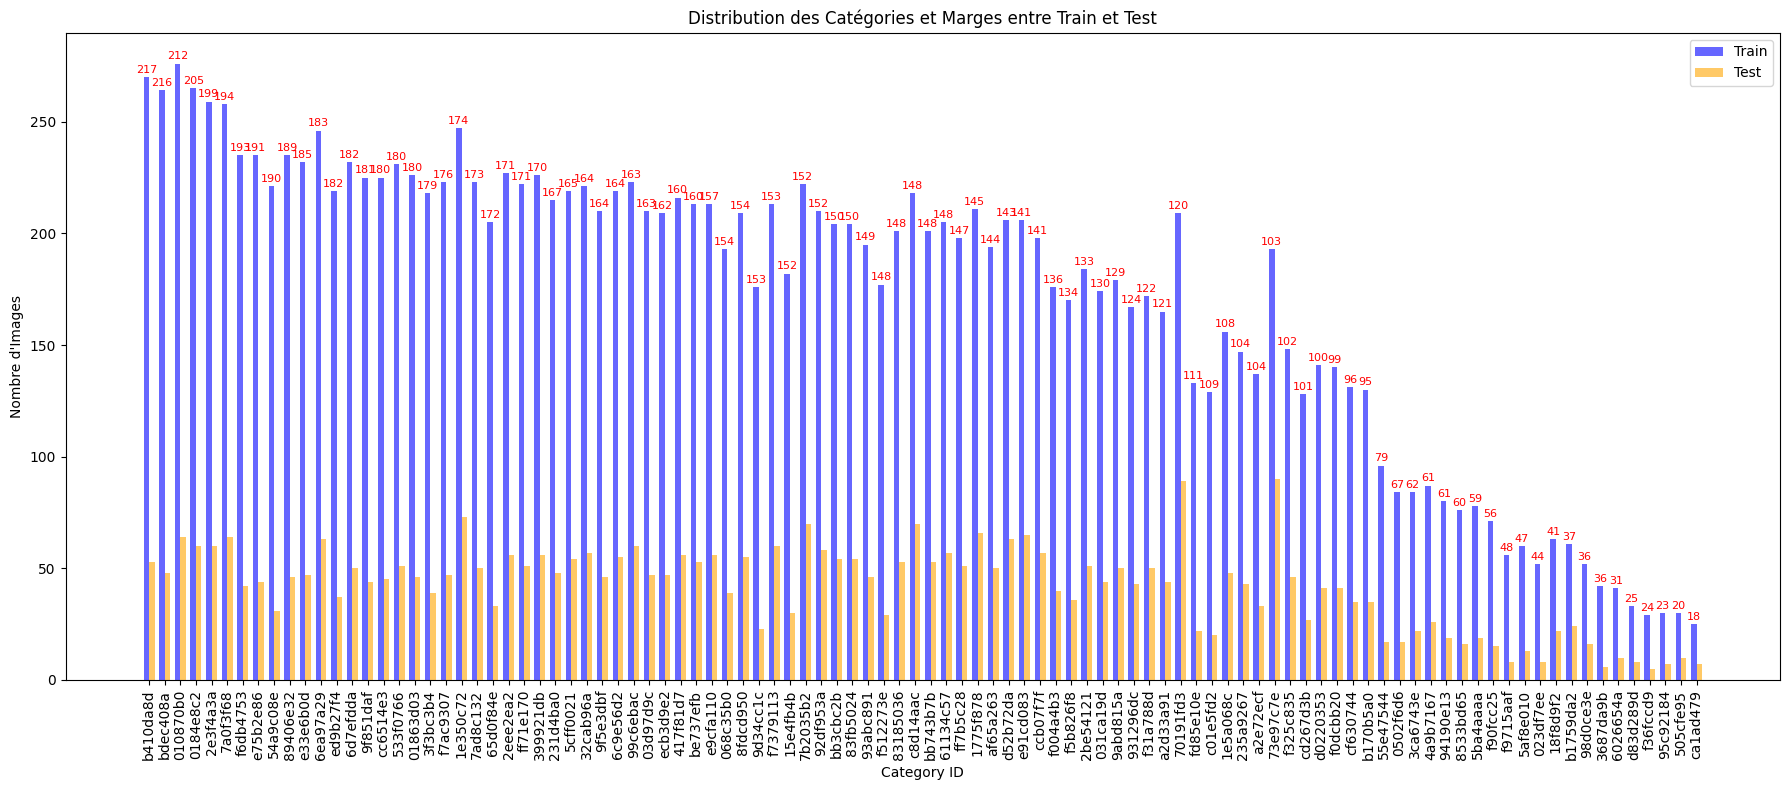

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_test = pd.read_csv(r'data\clean_testset.csv')
df_train = pd.read_csv(r'data\clean_trainset.csv')

category_distribution_test = df_test['category_id'].value_counts()
category_distribution_train = df_train['category_id'].value_counts()
categories = sorted(set(category_distribution_test.index).union(set(category_distribution_train.index)))

category_distribution_test = category_distribution_test.reindex(categories, fill_value=0)
category_distribution_train = category_distribution_train.reindex(categories, fill_value=0)

# Calculer les marges (différences) entre train et test
margins = category_distribution_train - category_distribution_test
# Trier les marges par ordre décroissant de valeur absolue
sorted_margins = margins.abs().sort_values(ascending=False).index
category_distribution_train = category_distribution_train[sorted_margins]
category_distribution_test = category_distribution_test[sorted_margins]
margins = margins[sorted_margins]

plt.figure(figsize=(18, 8))
width = 0.35  # Largeur des barres
x = range(len(sorted_margins))
plt.bar(x, category_distribution_train, width=width, label='Train', color='blue', alpha=0.6)
plt.bar([p + width for p in x], category_distribution_test, width=width, label='Test', color='orange', alpha=0.6)
for i in range(len(sorted_margins)):
    plt.text(x[i], max(category_distribution_train[i], category_distribution_test[i]) + 1, 
             f'{margins[i]}', ha='center', va='bottom', fontsize=8, color='red')
plt.title('Distribution des Catégories et Marges entre Train et Test')
plt.xlabel('Category ID')
plt.ylabel('Nombre d\'Images')
plt.xticks([p + width / 2 for p in x], sorted_margins, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


- La répartition entre les ensembles d'entraînement et de test est globalement bonne, car elle conserve des proportions similaires pour chaque catégorie, grâce à un échantillonnage stratifié. Cela permet une évaluation plus précise du modèle, même dans le cas d'un jeu de données déséquilibré.


(Meme si il faut faire attention aux métriques globales comme la précision qui peuvent être faussées par la surreprésentation de certaines classes, masquant les mauvaises performances du modèle sur les catégories sous-représentées.) 

# Synthèse
---

- Nous avons nettoyé notre jeu de données d'entraînement et de test.
- Les jeux de données nettoyé sont dans le dossier ``/data`` (clean_testset.csv et clean_trainset.csv)
- Le résultat final du fichier CSV sera une table avec deux colonnes : `image_id` et `category_id`.
- Nombre d'images d'entraînement : 13 820
- Nombre d'images de validation : 3 455
- Nous utiliserons la méthode ``ImageGenerator`` pour l'augmentation, redimensionnement, et normalisation de notre données d'entrainnement
- Nous contrôlerons les poids pendant l'entraînement pour gérer le déséquilibre des classes.